<a href="https://colab.research.google.com/github/idrissdeme/Machine_Leaning-Python-UERJ-2022/blob/master/Espectrometria_de_netron_Sinal_neutron__MLP_Keras_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** MLP LEARNING NEUTRON SIGNAL **




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import*

**Define the network hyperparameters**

In [2]:
# Trainign batch size 
batch_size = 56
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Number of classes ( multi-classification )
nb_classes = 10
# Learning rate
lr=0.1


Reding binary data

In [3]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'1MJBYDAGuoXgiurR6LwvnWIdPK1BmY7k-'})

fileDownloaded.GetContentFile('TRE286A - Cop.fon')

#import pandas as pd

#df = pd.read_table('TRE286A - Cop.fon', delimiter=';')

#df.head(8)

#file = open("TRE286A - Cop.fon","rb")
#print(file.read(8))
#(X_train, y_train), (X_test, y_test) =file
#file.close()


import numpy as np
import pandas as pd
# Create a dtype with the binary data format and the desired column names

dt = np.dtype("float64")
data = np.fromfile("TRE286A - Cop.fon", dtype=dt)
df = pd.DataFrame(data)
print(df)



             0
0      0.34393
1      0.35412
2      0.24170
3      0.00000
4      0.00000
...        ...
26317  0.22963
26318  0.29700
26319  0.34931
26320  0.47950
26321  0.33064

[26322 rows x 1 columns]


In [4]:
import numpy as np
import pandas as pd
# Create a dtype with the binary data format and the desired column names

dt = np.dtype("float64")
data = np.fromfile("TRE286A - Cop.fon", dtype=dt)

In [ ]:
len(data)

26322

In [6]:
df= pd.read_excel("/content/teste.xlsx")
df= df.drop(columns=["Unnamed: 0"])
df = df.dropna()
df



,E(MeV),Saídas
1,1.000000e-09,0.000003
2,1.585000e-09,0.000043
3,2.512000e-09,0.000077
4,3.981000e-09,0.003964
5,6.310000e-09,0.001548
...,...,...
80,7.943000e+00,0.130655
81,1.000000e+01,0.049621
82,1.259000e+01,0.010274
83,1.585000e+01,0.000728


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["E(MeV)"], df["Saídas"], test_size=0.33, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
"""X_train = X_train.reshape(600, 84)
X_test = X_test.reshape(1000, 84)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)
"""

"X_train = X_train.reshape(600, 84)\nX_test = X_test.reshape(1000, 84)\nX_train = X_train.astype('float32')\nX_test = X_test.astype('float32')\nX_train /= 255\nX_test /= 255\nY_Train = np_utils.to_categorical(y_train, nb_classes)\nY_Test = np_utils.to_categorical(y_test, nb_classes)\n"

**Define the MLP achitecture using KERAS sequential API**

In [26]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=1, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=50, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=25, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=10, kernel_initializer="normal"))
model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 25)                1275      
                                                                 
 dense_19 (Dense)            (None, 10)                260       
                                                                 
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Train the MLP**

In [19]:
"""X_train
X = np.array(X_train)
len(X)"""

'X_train\nX = np.array(X_train)\nlen(X)'

In [27]:
# Train
#y=np.array(y_train)
history = model.fit(X_train, y_train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/50
1/1 [==============================] - 1s 848ms/step - loss: 0.1792 - accuracy: 0.0000e+00 - val_loss: 0.1304 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 0.1763 - accuracy: 0.0000e+00 - val_loss: 0.1278 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 37ms/step - loss: 0.1736 - accuracy: 0.0000e+00 - val_loss: 0.1254 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1709 - accuracy: 0.0000e+00 - val_loss: 0.1231 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1684 - accuracy: 0.0000e+00 - val_loss: 0.1208 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.1660 - accuracy: 0.0000e+00 - val_loss: 0.1187 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1636 - accuracy: 0.0000e+00 - val_loss: 0.11

**Evaluate the MLP performance**

In [29]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

1/1 [==============================] - 0s 20ms/step - loss: 0.1260 - accuracy: 0.0000e+00
Summary: Loss over the test dataset: 0.13, Accuracy: 0.00


**Plot the training and validation performances**

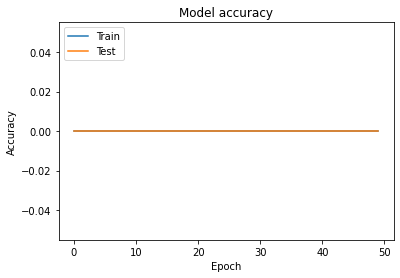

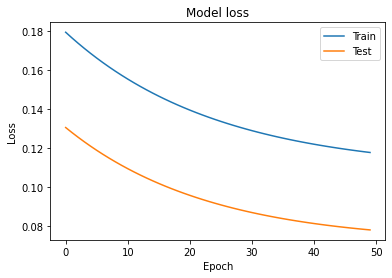

In [30]:
# Training History Visualization

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [39]:
"""Nplot = 56
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[1,n]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(1,84))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()"""

"Nplot = 56\nplt.figure(figsize=(10,10))\nY = model.predict(X_test, batch_size=64)\n#Y=model.predict(X_test) \nY=Y*10.\nprint(Y.shape)\nfor n in range(Nplot):\n  X=X_test[1,n]\n  ax = plt.subplot(4, 5, n+1)\n  plt.imshow(X.reshape(1,84))\n  plt.axis('off')\n  index = np.argmax(Y[n])\n  plt.title('Prediction='+str(index))\nplt.show()"